# Сжатие картинок с помощью SVD разложения
В этом задании нужно сделать сжатие изображения, сжатие с потерями. Для этого мы используем SVD разложение.

Примерный порядок действий:
1) Найти любую картинку,
2) Прочитать её с помощью библиотеки PIL
3) Преобразовать в numpy массив
4) Применить SVD к матрице - обязательно прочитайте справку по этой функции `np.linalg.svd`

**Примечание**: Цветная картинка представляет собой трёхканальное изображение RBG, поэтому напрямую SVD разложение применить не получится. Либо вы преобразуете изображение в одноканальное (градации серого), усредняя все три канала. Либо делаете SVD для всех трёх каналов в отдельности.

5) Далее оставляете небольшое количество сингулярных значений - 1, 2, 10, 30, 100. И выводите результат в виде получившейся картинки - чем больше сингулярных чисел, тем ближе приближённая матрица к исходной.

6) Сравните количество байт, необходимых для хранения исходной картинки и сжатой версии.

Ниже представлены основные функции и библиотеки, которые вам понадобятся.

Задание оформляете в виде блокнота jupyter. Особо понравившиеся картинки можно сохранить отдельно на диск, но мне удобнее чтобы они присутствовали в самом jupyter блокноте.

In [3]:
from PIL import Image
import numpy as np
from matplotlib import pyplot as plt

img = Image.open('koshechka.jpg')
w, h = img.size
# img = img.resize((w//4, h//4)) # можно не делать .resize(())

# x = np.array(img, dtype=np.float32) # преобразование из PIL в numpy array
# U, S, V = np.linalg.svd(X, full_matrices=False) # разложение SVD
# # обратное преобразование из numpy array в PIL с сохранение изображения на диск
# Image.fromarray(np.asarray(Y_r, dtype=np.uint8)).save(f'{r}.png')

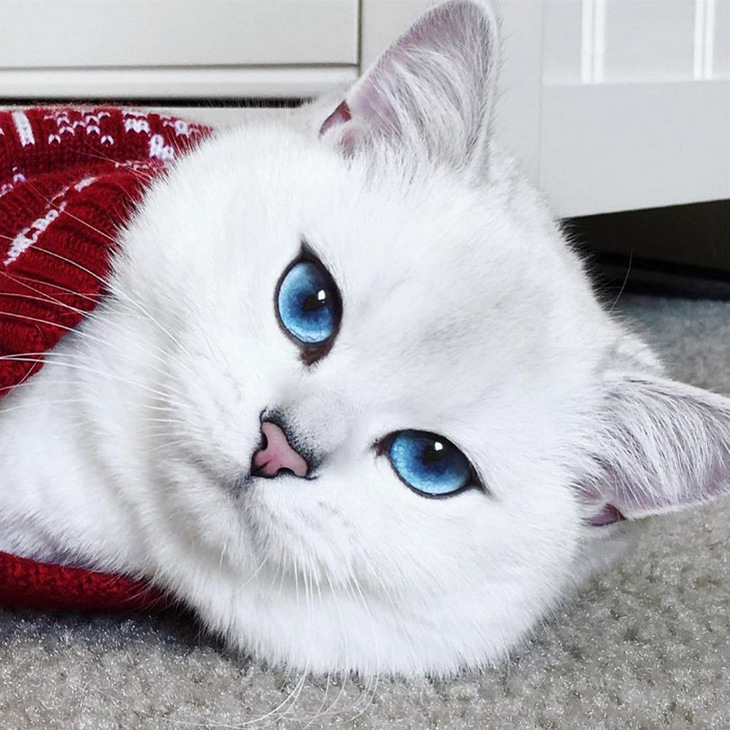

In [4]:
img

In [5]:
x = np.array(img, dtype=np.float32)
print("Форма массива:", x.shape)


Форма массива: (730, 730, 3)


In [6]:
U = []
S = []
V = []

for c in range(3):  # R, G, B
    U_c, S_c, V_c = np.linalg.svd(x[:, :, c], full_matrices=False)
    U.append(U_c)
    S.append(S_c)
    V.append(V_c)

print("SVD разложение выполнено для всех каналов")


SVD разложение выполнено для всех каналов


In [7]:
def reconstruct_image(U, S, V, r):
    h, w = U[0].shape[0], V[0].shape[1]
    img_rec = np.zeros((h, w, 3), dtype=np.float32)

    for c in range(3):
        img_rec[:, :, c] = (
            U[c][:, :r] @
            np.diag(S[c][:r]) @
            V[c][:r, :]
        )

    # ограничиваем значения пикселей
    img_rec = np.clip(img_rec, 0, 255)
    return img_rec.astype(np.uint8)


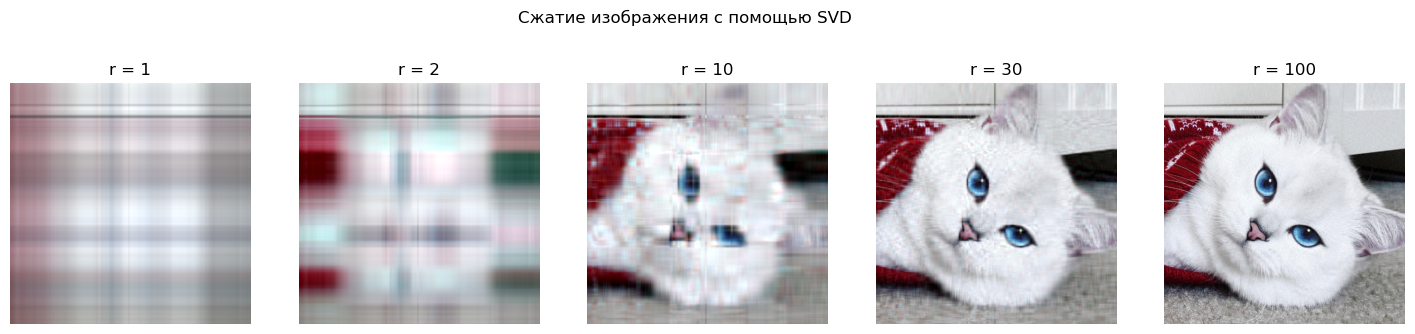

In [8]:
r_values = [1, 2, 10, 30, 100]

fig, axes = plt.subplots(1, len(r_values), figsize=(18, 4))

for ax, r in zip(axes, r_values):
    img_r = reconstruct_image(U, S, V, r)
    ax.imshow(img_r)
    ax.set_title(f"r = {r}")
    ax.axis('off')

plt.suptitle("Сжатие изображения с помощью SVD")
plt.show()


In [9]:
h, w, _ = x.shape

original_size = h * w * 3  # uint8

print(f"Исходный размер: {original_size / 1024:.2f} KB\n")

for r in r_values:
    compressed_size = 3 * r * (h + w + 1) * 4  # float32
    ratio = original_size / compressed_size

    print(
        f"r = {r:3d} | "
        f"Сжатый размер: {compressed_size / 1024:.2f} KB | "
        f"Коэффициент сжатия: {ratio:.2f}"
    )


Исходный размер: 1561.23 KB

r =   1 | Сжатый размер: 17.12 KB | Коэффициент сжатия: 91.19
r =   2 | Сжатый размер: 34.24 KB | Коэффициент сжатия: 45.59
r =  10 | Сжатый размер: 171.21 KB | Коэффициент сжатия: 9.12
r =  30 | Сжатый размер: 513.63 KB | Коэффициент сжатия: 3.04
r = 100 | Сжатый размер: 1712.11 KB | Коэффициент сжатия: 0.91


## Выводы

В данной работе было реализовано сжатие изображения с потерями с помощью
сингулярного разложения матрицы (SVD). Для цветного изображения разложение
выполнялось отдельно для каждого цветового канала.

Экспериментально показано, что при малом числе сингулярных значений
изображение теряет значительную часть деталей, однако при увеличении
параметра r качество восстановления быстро улучшается.

При r ≈ 30–100 визуально восстановленное изображение становится близким
к исходному, при этом объём данных, необходимый для хранения, существенно
меньше по сравнению с исходным изображением.

Таким образом, SVD-разложение позволяет эффективно сжимать изображения
с потерями, обеспечивая разумный компромисс между качеством и размером данных.
